# Part II - The Prosper Loan Data Investigation and Findings
## by Taiwo Oyerinde


## Investigation Overview

For this presentation, we shall be systematically investigating prosper loan data key features about the borrowers(Employment status and Occupation), factors that make them eligible for the loan and their tendency to pay back. 


## Dataset Overview

The original dataset used was provided in the Udacity Classroom. It contains 113,937 loans with 81 variables on each loan listing. But for this investigation, a subset of the original dataset that contains 20 variables of interest will be used.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('prosperLoanData.csv')

In [3]:
#subsetting the original data to focus on the variables of interest
loan = data[['MemberKey','EmploymentStatus','Occupation','ListingCategory (numeric)',
             'IsBorrowerHomeowner','StatedMonthlyIncome','IncomeRange','IncomeVerifiable',
             'DebtToIncomeRatio','LoanKey','LoanStatus','LoanOriginalAmount',
             'LoanOriginationDate','MonthlyLoanPayment','CreditScoreRangeLower',
             'CreditScoreRangeUpper','Term','BorrowerAPR','BorrowerRate','TotalProsperLoans']]

In [4]:
def figure(a,b):
    """
    We call this fuction to set the size of our chart
    ------
    This helps to avoid repetiton in other charts
    """
    return plt.figure(figsize=[a,b])

In [5]:
#Defining the 'titles' function to set the chart title and labels of our chart
def titles(x,y,z):
    return plt.xlabel(x),plt.ylabel(y),plt.title(z)

## Distribution Of Borrowers' Employment Status

Borrowers' employment status were distributed across a set of statuses but a greater percentage identified as employed and full-time. This is quite surprising as I earlier thought that most borrowers would identify as self-employed. 


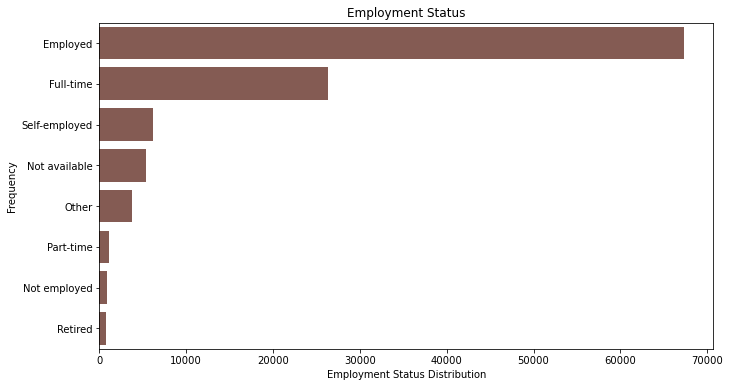

In [6]:
figure(11,6)
#assigning the color of the chart
base_color=sb.color_palette()[5]
#sorting the unique values of 'EmploymentStatus'in descending order
freq=loan['EmploymentStatus'].value_counts()
order=freq.index
#plotting horizontal bars to represent the frequency of each unique value 
sb.countplot(data=loan, y='EmploymentStatus', order=order, color=base_color)
#calling the function
titles('Employment Status Distribution','Frequency','Employment Status');

## Distribution Of Borrowers' Occupation
Although a very significant number of borrowers didn't specify their occupation, Borrowers who identified as professionals were the next highest. The top 10 occupations of borrowers are shown in the next slide


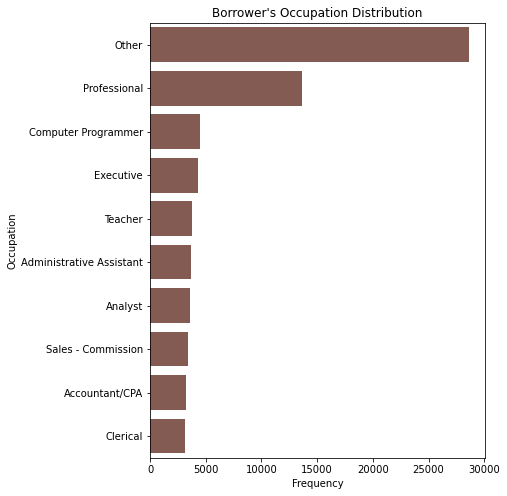

In [7]:
figure(6,8)
dist=loan.Occupation.value_counts().index
sb.countplot(data=loan,y='Occupation', color=base_color,order=dist[:10])
titles('Frequency','Occupation','Borrower\'s Occupation Distribution');

## Borrowers' Income Range Distribution
As will be displayed in the next slide, majority of the borrowers earn no less than $25,0000

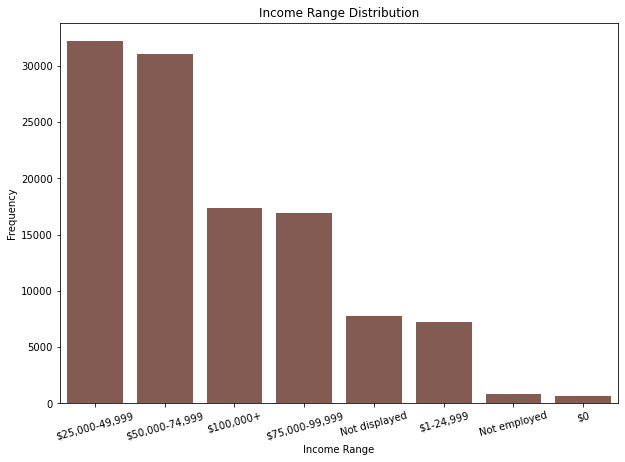

In [8]:
figure(10,7)
order=loan['IncomeRange'].value_counts().index
sb.countplot(data=loan,x='IncomeRange',color=base_color,order=order)
titles('Income Range','Frequency','Income Range Distribution')
plt.xticks(rotation='15');

## Relationship between the Borrowers' Stated Monthly Income, Annual Percentage Rate Monthly loan payment and loan original amount
A heatmap was created to show the correlation amongst the above stated variables and the following were noted;
1. As expected, monthly loan payment and loan original amount were the most positively correlated.
2. A good number of borrowers with higher monthly incomes were the ones with higher loan monthly payments.

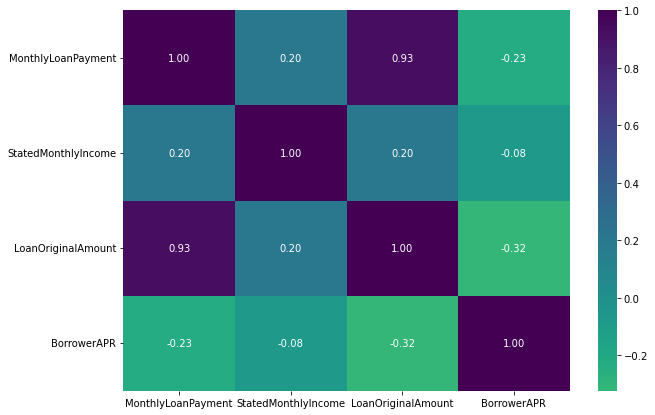

In [9]:
#creating numeric variables
numeric = ['MonthlyLoanPayment','StatedMonthlyIncome','LoanOriginalAmount','BorrowerAPR']
figure(10,7)
sb.heatmap(loan[numeric].corr(), annot = True, fmt='.2f', cmap= 'viridis_r', center=0);

## Relationship between Loan Term and Loan Original Amount
Here, we illustrated the relationship using a box plot and it was discovered that the higher the loan amount taken, the longer the time for repayment

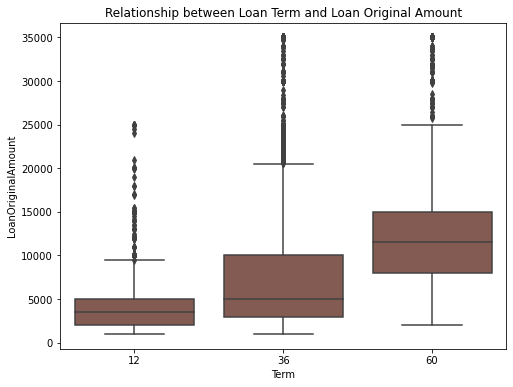

In [10]:
loan['Term']=loan['Term'].astype('category')
figure(8,6)
sb.boxplot(data=loan, x='Term', y='LoanOriginalAmount', color=base_color)
plt.title('Relationship between Loan Term and Loan Original Amount');

## Relationship between Home Ownership, Loan status and Verifiable Income
Finally, we explored the relationships above. I was surprised to discover that more non-homeowners completed their loans than home owners and that most borrowers have a verifiable income source.

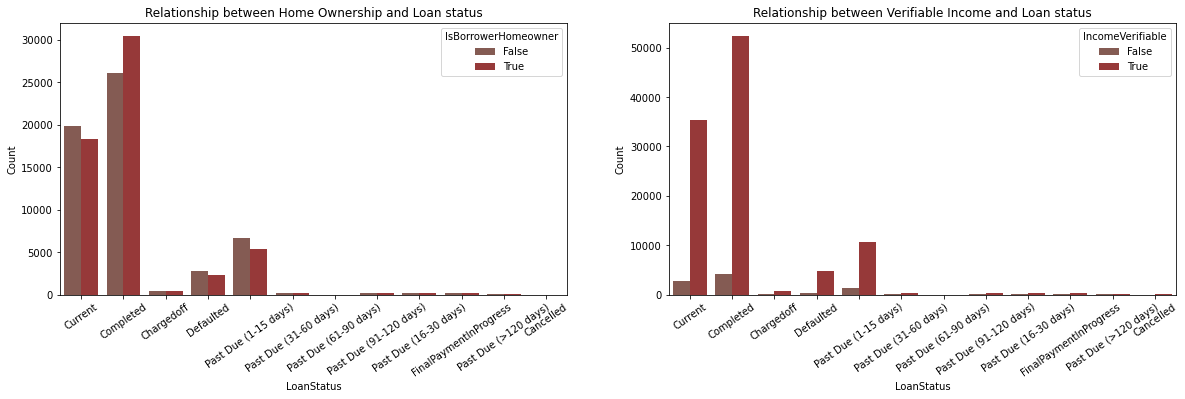

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize = [20,5])

sb.countplot(data=loan, x='LoanStatus',hue= 'IsBorrowerHomeowner', palette=[base_color,'Brown'], ax = ax[0])
ax[0].set_title('Relationship between Home Ownership and Loan status')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(loan.LoanStatus.value_counts(ascending=False).index,rotation='35')


sb.countplot(data=loan, x='LoanStatus',hue= 'IncomeVerifiable', palette=[base_color,'Brown'], ax = ax[1])
ax[1].set_title('Relationship between Verifiable Income and Loan status')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(loan.LoanStatus.value_counts(ascending=False).index,rotation='35')

plt.show();

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt